<a href="https://colab.research.google.com/github/ikypakey/PCVK/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


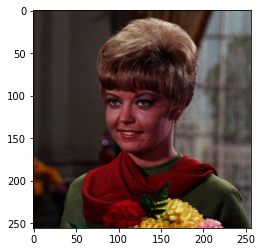

In [19]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
img = cv.imread('/content/drive/MyDrive/img/female.tiff')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

Mengubah Tingkat Kecerahan Citra
Masukkan Nilai Kecerahan : 30


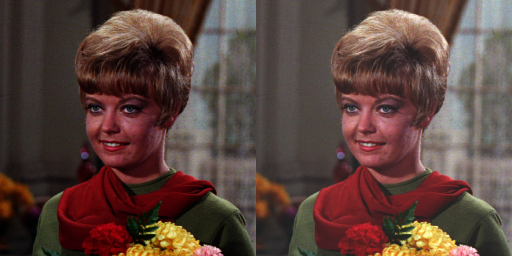

In [23]:
print ('Mengubah Tingkat Kecerahan Citra')
print ('=================================')
try :
  brightness = int (input('Masukkan Nilai Kecerahan : '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/img/female.tiff')  
brightness_image=np.zeros(original.shape, original.dtype)

# Akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c]+brightness, 0, 255)

# cara simple tanpa loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame=cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


Mengubah Kontras dan Tingkat Kecerahan Citra
Masukkan Nilai Kecerahan [-255, 255] : 30
Masukkan kontras [1.0 - 3.0]: 1


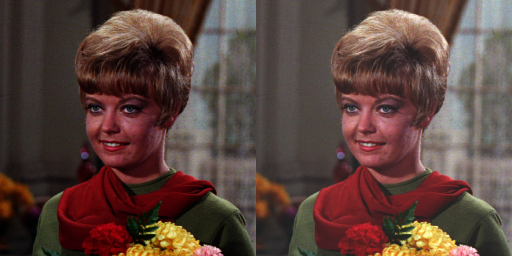

In [26]:
# Tugas 1
print ('Mengubah Kontras dan Tingkat Kecerahan Citra')
print ('=================================')
try :
  brightness = int (input('Masukkan Nilai Kecerahan [-255, 255] : '))
  contrass = int(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/img/female.tiff')  
brightness_image=np.zeros(original.shape, original.dtype)

# Akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(contrass*original[y,x,c]+brightness, 0, 255)

# cara simple tanpa loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame=cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Mengubah Tingkat Kecerahan Citra Dengan Transformasi Log 
Masukkan Nilai Kecerahan : 20


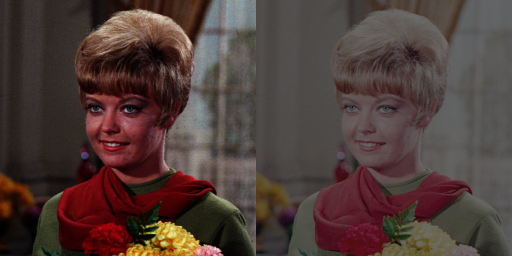

In [28]:
# Tugas 2 
print ('Mengubah Tingkat Kecerahan Citra Dengan Transformasi Log ')
print ('=================================')
try :
  brightness = int (input('Masukkan Nilai Kecerahan : '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/img/female.tiff')  
brightness_image=np.zeros(original.shape, original.dtype)

# Akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     brightness_image[y,x,c] = np.clip(brightness*(np.log(1.0+original[y,x,c])), 0, 255)

# cara simple tanpa loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame=cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

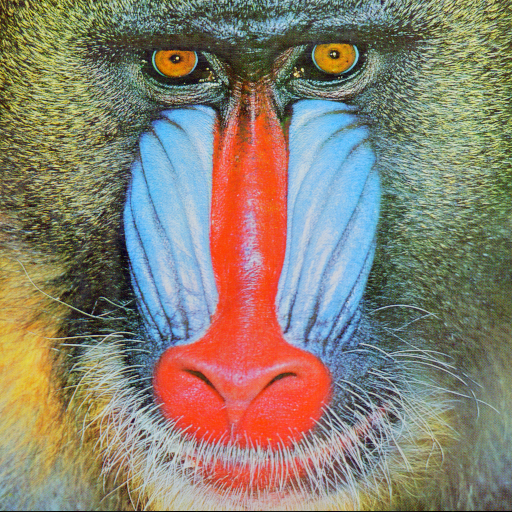

In [39]:
img = cv.imread('/content/drive/MyDrive/img/mandrill.tiff')
img_ori = cv.cvtColor(img,cv.COLOR_BGR2RGB)
cv2_imshow(img)

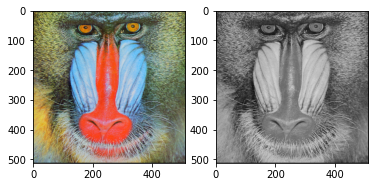

In [40]:
# Tugas 3  A
img2 = cv.imread('/content/drive/MyDrive/img/mandrill.tiff')
img2[:] = img2.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_ori)
ax[1].imshow(img2)

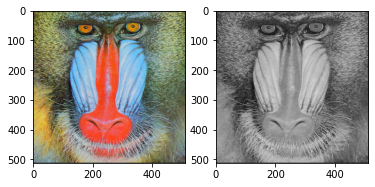

In [41]:
# Tugas 3 B
img3b = cv.imread('/content/drive/MyDrive/img/mandrill.tiff')
img3b[:] = np.max(img3b,axis=-1,keepdims=10)/2+np.min(img3b,axis=-1,keepdims=10)/2
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_ori)
ax[1].imshow(img3b)

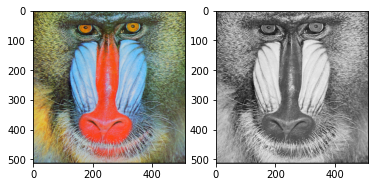

In [42]:
# Tugas 3C
img3c = cv.imread('/content/drive/MyDrive/img/mandrill.tiff')
R, G, B = img3c[:,:,0], img3c[:,:,1], img3c[:,:,2]
gray_img3c = (0.21 * R) + (0.72 * G) + (0.07 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_ori)
ax[1].imshow(gray_img3c, cmap='gray')

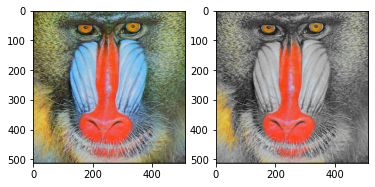

In [47]:
# Tugas 4
img4 = cv.imread('/content/drive/MyDrive/img/mandrill.tiff')
ret, mask = cv.threshold(img4[:,:,2], 180, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(img4)
mask3[:, :, 0] = mask
mask3[:, :, 1] = mask
mask3[:, :, 2] = mask

red = cv.bitwise_and(img_ori, mask3)
gray = cv.cvtColor(img4, cv.COLOR_BGR2GRAY)
img4 = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(img4, 255 - mask3)

out = gray + red
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_ori)
ax[1].imshow(out, cmap='gray')
